In [65]:
# Kernel PCA 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, KernelPCA
from sklearn.utils import extmath

df = pd.read_csv('train.csv')
df2 = pd.read_csv('test.csv')

cols = df.columns.tolist()
cols.insert(0, cols.pop(cols.index('Viral')))
df = df.reindex(columns=cols)

cols2 = df2.columns.tolist()
cols2.insert(0, cols2.pop(cols2.index('Viral')))
df2 = df2.reindex(columns=cols2)

X = df.iloc[:, 2:]
from sklearn.preprocessing import StandardScaler
X_std= StandardScaler().fit_transform(X)

X2 = df2.iloc[:, 2:]
from sklearn.preprocessing import StandardScaler
X2_std= StandardScaler().fit_transform(X2)

kpca1 = KernelPCA(n_components=5, kernel='rbf', gamma=0.01)
Xkpca1 = kpca1.fit_transform(X_std)

kpca2 = KernelPCA(n_components=5, kernel='rbf', gamma=0.01)
Xkpca2 = kpca2.fit_transform(X2_std)

print(len(Xkpca1))
print(len(Xkpca2))

318
80


165 153
[14:56:55] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
35 45
[1 1 1 0 1 1 0 1 1 0 0 0 1 0 1 0 1 1 1 0 0 0 1 1 1 1 0 1 1 0 0 0 1 0 0 1 0
 1 0 1 1 1 0 0 0 1 0 0 0 1 0 0 0 1 1 1 1 0 0 0 1 0 1 1 1 1 1 0 1 1 0 0 0 0
 1 0 1 1 1 1]


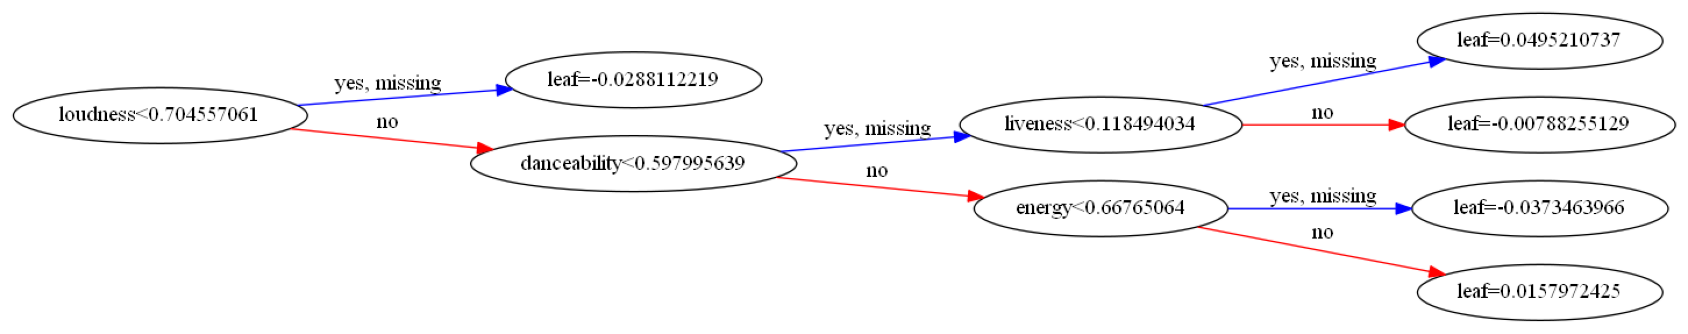

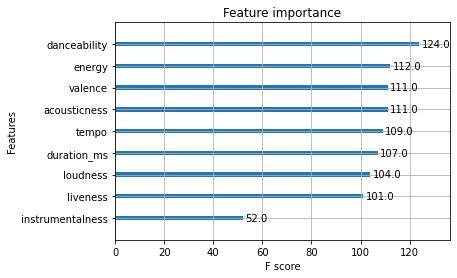

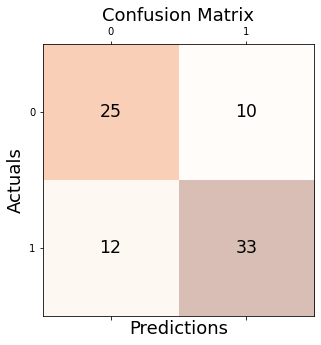

Accuracy: 0.725
Precision: 0.767
Recall: 0.733


In [74]:
# XGBoost on Original Data (without PCA)
from xgboost import XGBClassifier
import pandas as pd
from matplotlib import pyplot as plt
import graphviz

from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt

#Setting up training dataset
df_train = pd.read_csv("train.csv")
label = df_train["Viral"]

print(sum(df_train["Viral"] == 0), sum(df_train["Viral"] == 1))

df_train = df_train.drop(columns = ['Unnamed: 0', 'Viral'])
df_train = df_train.iloc[:]

#Setting up testing dataset
df_test = pd.read_csv("test.csv")
true_labels = df_test.loc[:, "Viral"]
df_test = df_test.drop(columns = ['Unnamed: 0', 'Viral'])
df_test = df_test.iloc[:]

#Training model
model = XGBClassifier(use_label_encoder=False)
model.fit(df_train, label)
#model.fit(Xkpca1, label)

#Testing
ypred = model.predict(df_test)

print(sum(true_labels == 0), sum(true_labels == 1))
print(ypred)

#Accuracy
acc = sum(ypred == true_labels) / true_labels.shape[0]

fig, ax = plt.subplots(figsize=(30, 30))
ax = xgb.plot_tree(model, num_trees = model.get_booster().best_iteration, rankdir='LR', ax=ax)

ax1 = xgb.plot_importance(model)

ax1.figure.savefig('xgboost_plot_importance_withoutPCA.png')
ax.figure.savefig('xgboost_DT_withoutPCA.png')

# Calculate the confusion matrix
#
conf_matrix = confusion_matrix(y_true=true_labels, y_pred=ypred)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

print('Accuracy: %.3f' % acc)
print('Precision: %.3f' % precision_score(true_labels, ypred))
print('Recall: %.3f' % recall_score(true_labels, ypred))

165 153
[14:58:02] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
35 45
[0 1 1 1 0 0 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 0 0 1 0 1 1 1 0 0 1 1 1 1 0 1 0
 1 0 0 1 1 0 1 1 1 1 0 0 1 0 0 1 1 1 1 0 0 0 1 1 1 1 1 0 0 1 1 1 1 0 0 1 0
 1 0 0 1 0 0]
0.5875


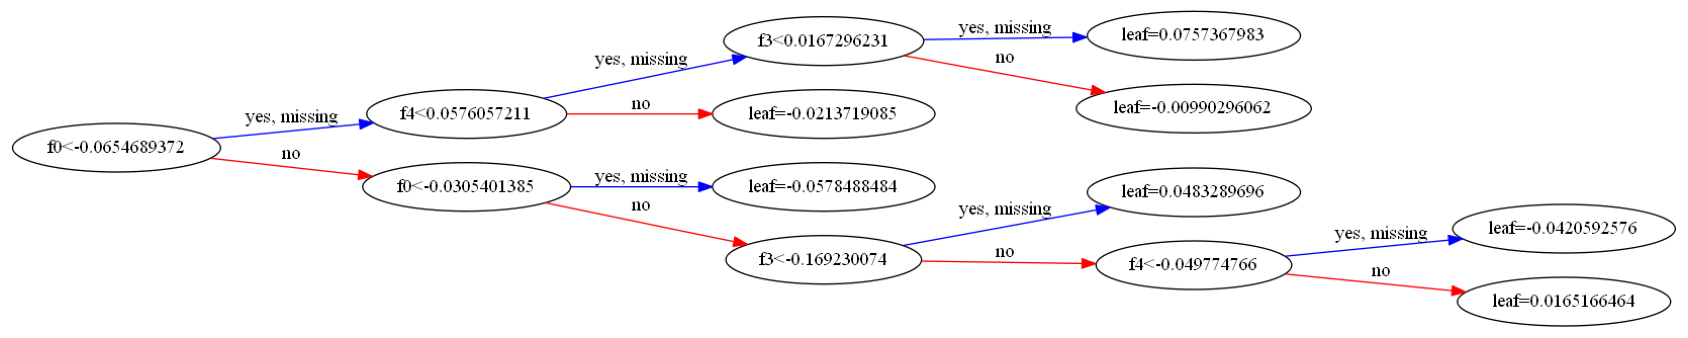

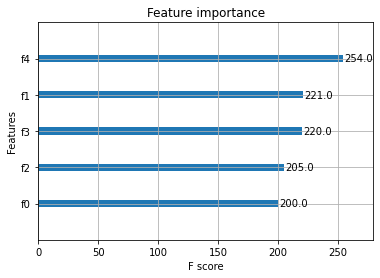

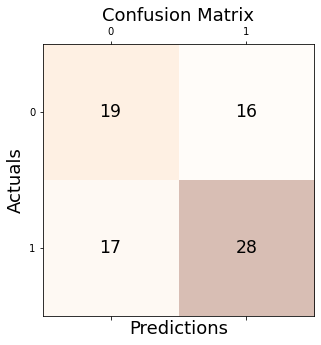

Accuracy: 0.588
Precision: 0.636
Recall: 0.622


In [75]:
# XGBoost on Original Data (without PCA)
from xgboost import XGBClassifier
import pandas as pd
from matplotlib import pyplot as plt
import graphviz

from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt

#Setting up training dataset
df_train = pd.read_csv("train.csv")
label = df_train["Viral"]

print(sum(df_train["Viral"] == 0), sum(df_train["Viral"] == 1))

df_train = df_train.drop(columns = ['Unnamed: 0', 'Viral'])
df_train = df_train.iloc[:]

#Setting up testing dataset
df_test = pd.read_csv("test.csv")
true_labels = df_test.loc[:, "Viral"]
df_test = df_test.drop(columns = ['Unnamed: 0', 'Viral'])
df_test = df_test.iloc[:]

#Training model
model = XGBClassifier(use_label_encoder=False)
model.fit(Xkpca1, label)

#Testing
ypred = model.predict(Xkpca2)

print(sum(true_labels == 0), sum(true_labels == 1))
print(ypred)

#Accuracy
acc = sum(ypred == true_labels) / true_labels.shape[0]
print(acc)

fig, ax = plt.subplots(figsize=(30, 30))
ax = xgb.plot_tree(model, num_trees = model.get_booster().best_iteration, rankdir='LR', ax=ax)

ax1 = xgb.plot_importance(model)

ax1.figure.savefig('xgboost_plot_importance_withPCA.png')
ax.figure.savefig('xgboost_DT_withPCA.png')

# Calculate the confusion matrix
#
conf_matrix = confusion_matrix(y_true=true_labels, y_pred=ypred)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

print('Accuracy: %.3f' % acc)
print('Precision: %.3f' % precision_score(true_labels, ypred))
print('Recall: %.3f' % recall_score(true_labels, ypred))